In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


###기본 모델 돌리기###

In [ ]:
import yfinance as yf
google=yf.Ticker("GOOG") #구글
nasdaq=yf.Ticker("^IXIC") #NASDAQ
hist=google.history(period="max") #모든기간 데이터 불러오기
hist1=nasdaq.history(period="max")

import pandas as pd
df=pd.DataFrame(hist)
df=df.reset_index()
df1=pd.DataFrame(hist1)
df1=df1.reset_index()
df1=df1[df1["Date"]>="2004-08-19"] #2004년 08 19 이후로만 데이터 가져오기

#단순 이동평균 (Simple Moving Average)
#지수 이동 평균(Exponetial Moving Average) df.Close.ewm(5)
#>>보다 최근 값에 가중치를 두면서 이동평균 계산 "평활계수"
#가중 이동 평균(Weighted Moving Average)
#>>현재 가까운 가격이 과거 가격보다 더 중요한 전제 를바탕

df['sma5']=df.Close.rolling(5).mean() #1주
df['sma20']=df.Close.rolling(20).mean() #4주
df['sma50']=df.Close.rolling(50).mean() #한 분기
df['sma100']=df.Close.rolling(100).mean() #반년
df['sma200']=df.Close.rolling(200).mean() #1년

#df["Volume_lag"]=df["Volume"].shift(1)
#df["Close_lag"]=df["Close"].shift(1)
#df["Open_lag"]=df["Open"].shift(1)
#df["Volume_d"]=(df["Volume_lag"]-df["Volume"])/df["Volume_lag"]
#df["Close_d"]=(df["Close_lag"]-df["Close"])/df["Close_lag"]
#df["Open_d"]=(df["Open_lag"]-df["Open"])/df["Open_lag"]
#df["Y_d"]=df["Close_d"].shift(-1)

df.reset_index(drop=True,inplace=True)
df1.reset_index(drop=True,inplace=True)

#df["Y_class"]=0
df["Y"]=df["Close"].shift(-1) #하루 이후의 종가 데이터가 종속변수
#df["Y_lag"]=df["Y"].shift(1)
#df["Y"]=(df["Y_lag"]-df["Y"])/df["Y"]*100
'''
for i,j in enumerate(df["Y"]):
  if j>=df["Y"].describe()["75%"]:
    df["Y_class"][i]=int(3)
  elif j>=df["Y"].describe()["50%"]:
    df["Y_class"][i]=int(2)
  elif j>=df["Y"].describe()["25%"]:
    df["Y_class"][i]=int(1)
  else:
    df["Y_class"][i]=int(0)
'''
import statsmodels.api as sm
google_cycle, google_trend=sm.tsa.filters.hpfilter(df[["Close"]],lamb=1600) #hp filter씌우기
google_cycle_o, google_trend_o=sm.tsa.filters.hpfilter(df[["Open"]],lamb=1600)
google_decomp=df[["Close"]].copy()
google_decomp["cycle"]=google_cycle
google_decomp["trend"]=google_trend
df["trend"]=google_decomp["trend"].copy()
df["trend_o"]=google_trend_o
df["cycle"]=google_decomp["cycle"]
df["cycle_o"]=google_cycle_o
df["Y_trend"]=df["trend"].shift(-1)


In [ ]:
df

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,sma5,sma20,sma50,sma100,sma200,Y,trend,trend_o,cycle,cycle_o,Y_trend
0,2004-08-19 00:00:00-04:00,2.490664,2.591785,2.390042,2.499133,897427216,0.0,0.0,NaN,NaN,NaN,NaN,NaN,2.697639,2.550934,2.550307,-0.051801,-0.059643,2.554769
1,2004-08-20 00:00:00-04:00,2.515820,2.716817,2.503118,2.697639,458857488,0.0,0.0,NaN,NaN,NaN,NaN,NaN,2.724787,2.554769,2.553772,0.142870,-0.037952,2.558572
2,2004-08-23 00:00:00-04:00,2.758411,2.826406,2.716070,2.724787,366857939,0.0,0.0,NaN,NaN,NaN,NaN,NaN,2.611960,2.558572,2.557199,0.166215,0.201212,2.562399
3,2004-08-24 00:00:00-04:00,2.770615,2.779581,2.579581,2.611960,306396159,0.0,0.0,NaN,NaN,NaN,NaN,NaN,2.640104,2.562399,2.560528,0.049561,0.210087,2.566411
4,2004-08-25 00:00:00-04:00,2.614201,2.689918,2.587302,2.640104,184645512,0.0,0.0,2.634725,NaN,NaN,NaN,NaN,2.687676,2.566411,2.563824,0.073693,0.050377,2.570800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4841,2023-11-10 00:00:00-05:00,131.529999,134.270004,130.869995,134.059998,20872900,0.0,0.0,132.571997,132.421999,134.6220,130.6565,119.000825,133.639999,132.665065,132.207643,1.394932,-0.677645,132.925098
4842,2023-11-13 00:00:00-05:00,133.360001,134.110001,132.770004,133.639999,16409900,0.0,0.0,133.009998,132.079499,134.5588,130.7542,119.165475,135.429993,132.925098,132.418173,0.714902,0.941828,133.199396
4843,2023-11-14 00:00:00-05:00,135.649994,137.240005,135.100006,135.429993,22317300,0.0,0.0,133.615997,131.801498,134.5332,130.8783,119.352875,136.380005,133.199396,132.642512,2.230596,3.007482,133.481673
4844,2023-11-15 00:00:00-05:00,136.639999,136.839996,135.330002,136.380005,15840900,0.0,0.0,134.239999,131.656499,134.5534,131.0512,119.535425,138.699997,133.481673,132.874019,2.898332,3.765980,133.767032


In [ ]:
df=df.drop(len(df)-1)
df=df.iloc[200:,:]
df1=df1.iloc[200:,:]
df1=df1.drop(len(df1)-1)

#df1=df1.rename(columns={"Close":"nasdaq"})
#df["nasdaq"]=df1["nasdaq"]

In [ ]:
df_1=df[:1161]
df_2=df[1161:1161*2]
df_3=df[1161*2:1161*3]
df_4=df[1161*3:]
len(df_1),len(df_2),len(df_3),len(df_4)

(1161, 1161, 1161, 1162)

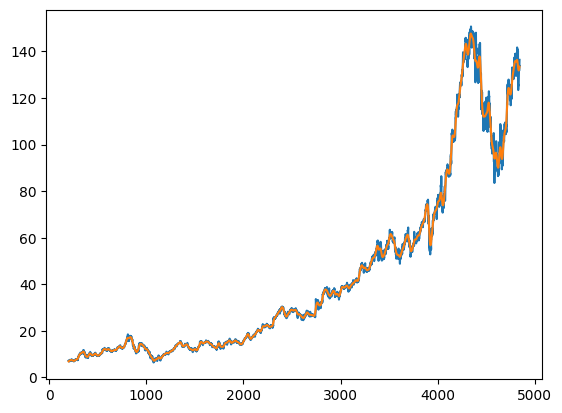

In [ ]:
import matplotlib.pyplot as plt #1600
fig,ax=plt.subplots()
ax.plot(df.index,df["Close"])
ax.plot(df.index,df["trend"])

plt.show()

In [1]:
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset
import numpy as np

#model=Deep_lstm(7,128,0.2,1,2)
class Deep_lstm(nn.Module):
    def __init__(self,input_dim,hidden_dim,dropout_rate,output_dim,num_layer):
        """
        (batch,num_feature, data)
        => (batch,7,20)의 데이터를 단위로 train
        hidden size 128
        layer 2개 쌓자
        """
        super(Deep_lstm,self).__init__()
        self.input_dim=input_dim
        self.hidden_dim=hidden_dim
        self.num_layer=num_layer
        self.dropout_rate=dropout_rate
        self.output_dim=output_dim
        self.lstm=nn.LSTM(input_size=self.input_dim,hidden_size=self.hidden_dim,
                         num_layers=self.num_layer,batch_first=False,dropout=self.dropout_rate)
        self.linear=nn.Linear(in_features=self.hidden_dim,out_features=self.output_dim)

    def forward(self,x,hidden=None):
        lstm_out,hidden=self.lstm(x,hidden)
        linear_out=self.linear(lstm_out)
        return linear_out, hidden

In [ ]:
def train(model,train_and_valid_data,epochs):
        train_x, train_y, valid_x, valid_y= train_and_valid_data
        train_x, train_y = torch.from_numpy(train_x).float(),torch.from_numpy(train_y).float()
        train_loader=DataLoader(TensorDataset(train_x,train_y),batch_size=32)

        valid_x, valid_y = torch.from_numpy(valid_x).float(),torch.from_numpy(valid_y).float()
        valid_loader=DataLoader(TensorDataset(valid_x,valid_y),batch_size=32)

        device=torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
        model=model.to(device)
        optimizer=torch.optim.Adam(model.parameters(),lr=0.001)
        criterion=torch.nn.MSELoss()
        valid_loss_min=float("inf")
        bad_epoch=0
        global_step=0
        for epoch in range(epochs):
            train_loss_array=[]
            hidden_train=None
            model.train()
            for i, _data in enumerate(train_loader):
                _train_x,_train_y=_data[0].to(device),_data[1].to(device)
                optimizer.zero_grad()
                pred,hidden_train=model(_train_x,hidden_train)

                h_0, c_0 = hidden_train
                h_0.detach_(),c_0.detach_()
                hidden_Train=(h_0,c_0)
            loss=criterion(pred,_train_y)
            loss.backward()
            optimizer.step()
            train_loss_array.append(loss.item())
            global_step+=1
            if global_step%100==0:
                print("epoch: %d loss: %f" %(epoch, loss.item()))

            model.eval()
            valid_loss_array=[]
            hidden_valid=None
            for _valid_x,_valid_y in valid_loader:
                _valid_x,_valid_y=_valid_x.to(device),_valid_y.to(device)
                pred,hidden_valid=model(_valid_x,hidden_valid)
                loss=criterion(pred,_valid_y)
                valid_loss_array.append(loss.item())

            train_loss_cur=np.mean(train_loss_array)
            valid_loss_cur=np.mean(valid_loss_array)
            print("train loss: %f valid loss: %f" % (train_loss_cur,valid_loss_cur))
            if valid_loss_cur<valid_loss_min:
                valid_loss_min=valid_loss_cur
                bad_epoch=0
            else:
                bad_epoch+=1
                if bad_epoch>=10:
                    torch.save(model.state_dict(),"/content/drive/MyDrive/lstm.pt")
                    print("Training stops early in epoch {}".format(epoch))
                    break
            torch.save(model.state_dict(),"/content/drive/MyDrive/lstm.pt")

def predict(x,model):
    test_x=torch.from_numpy(x).float()
    test_set=TensorDataset(test_x)
    test_loader=DataLoader(test_set,batch_size=1)

    device=torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
    result=torch.Tensor().to(device)
    model.eval()
    hidden_predict=None
    for _data in test_loader:
        data_x=_data[0].to(device)
        pred,hidden_predict=model(data_x,hidden_predict)
        cur_pred=torch.squeeze(pred,dim=0)
        result=torch.cat((result,cur_pred),dim=0)

    return result.detach().cpu().numpy()

In [ ]:
import numpy as np
train_data_rate=0.85
valid_data_rate=0.15

data_x=df[["Open","Close","High","Low","Volume","sma5","sma20","sma50","sma100","sma200","trend","trend_o","cycle","cycle_o"]]
data_y=df[["Y"]]
data_columns=[*data_x.columns]
data_x=np.asarray(data_x)
data_y=np.asarray(data_y)
data_num=data_x.shape[0] #row
train_num=int(data_num*train_data_rate)

data_mean=np.mean(data_x,axis=0)
data_std=np.std(data_x,axis=0)
norm_data_x=(data_x.data-data_mean)/data_std
norm_data_y=(data_y-data_y.mean())/data_y.std()

predict_day=1
time_step=50
epoch=20
train_set_x=norm_data_x[:train_num]
test_set_x=norm_data_x[train_num:]
train_set_y=norm_data_y[:train_num]
test_set_y=norm_data_y[train_num:]

time_step=100일떄
range step 20일때 가장 좋음
num_layer=1일때 가장 좋음
hidden_unit은 64일때 가장 좋음

In [ ]:
from sklearn.model_selection import train_test_split
feature_data=train_set_x
label_data=train_set_y
train_x = [feature_data[start_index + i*time_step : start_index + (i+1)*time_step]
            for start_index in range(0,time_step)
            for i in range((train_num - start_index) // time_step)]
train_y = [label_data[start_index + i*time_step : start_index + (i+1)*time_step]
            for start_index in range(0,time_step)
            for i in range((train_num - start_index) // time_step)]
train_x, train_y = np.array(train_x), np.array(train_y)
train_x, valid_x, train_y, valid_y = train_test_split(train_x, train_y, test_size=valid_data_rate,
                                                              random_state=1234,
                                                              shuffle=True)
train_and_valid_data=(train_x,train_y,valid_x,valid_y)

In [ ]:
train_x.shape

(3314, 50, 14)

In [ ]:
model=Deep_lstm(14,32,0.4,1,1)
epochs=100
train(model,train_and_valid_data,epochs)

train loss: 0.510693 valid loss: 0.414426
train loss: 0.487389 valid loss: 0.397479
train loss: 0.464751 valid loss: 0.381012
train loss: 0.442721 valid loss: 0.364994
train loss: 0.421256 valid loss: 0.349402
train loss: 0.400313 valid loss: 0.334208
train loss: 0.379849 valid loss: 0.319385
train loss: 0.359827 valid loss: 0.304917
train loss: 0.340223 valid loss: 0.290798
train loss: 0.321026 valid loss: 0.277035
train loss: 0.302246 valid loss: 0.263654
train loss: 0.283911 valid loss: 0.250700
train loss: 0.266078 valid loss: 0.238238
train loss: 0.248828 valid loss: 0.226358
train loss: 0.232276 valid loss: 0.215175
train loss: 0.216572 valid loss: 0.204832
train loss: 0.201903 valid loss: 0.195496
train loss: 0.188490 valid loss: 0.187359
train loss: 0.176588 valid loss: 0.180620
train loss: 0.166465 valid loss: 0.175462
train loss: 0.158379 valid loss: 0.171997
train loss: 0.152507 valid loss: 0.170180
train loss: 0.148854 valid loss: 0.169710
train loss: 0.147128 valid loss: 0

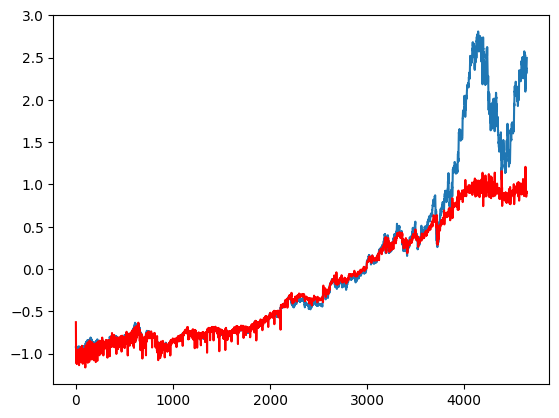

In [ ]:
import matplotlib.pyplot as plt

predict_x=norm_data_x

result=predict(predict_x,model)
fig,ax=plt.subplots()
ax.plot(norm_data_y)
ax.plot(result, color='r')
plt.show()

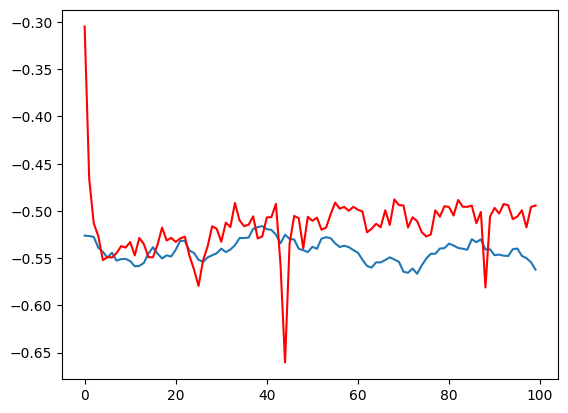

In [ ]:
import matplotlib.pyplot as plt

predict_x=norm_data_x[2000:2100]

result=predict(predict_x,model)
fig,ax=plt.subplots()
ax.plot(norm_data_y[2000:2100])
ax.plot(result, color='r')
plt.show()

In [ ]:
criterion=torch.nn.MSELoss()
test_pred=predict(test_set_x,model)
np.sum((test_pred-test_set_y)**2)/len(test_set_y)

1287.7916565809755

In [ ]:
a=predict(test_set_x,model)
a.size

697

In [ ]:
b=[]
for i in a:
  if i>=0:
    b.append(1)
  else:
    b.append(0)

c=[]
for i in test_set_y:
  if i>0:
    c.append(1)
  else:
    c.append(0)

acc=0
for i in range(len(b)):
  if b[i]==c[i] :
    acc+=1

print(100*acc/len(b))

100.0


In [ ]:
a=predict(train_set_x,model)
b=[]
for i in a:
  if i>=0:
    b.append(1)
  else:
    b.append(0)

c=[]
for i in train_set_y:
  if i>0:
    c.append(1)
  else:
    c.append(0)

acc=0
for i in range(len(b)):
  if b[i]==c[i] :
    acc+=1

print(100*acc/len(b))

99.8226051697922


In [ ]:
# @title 앙상블 데이터 핸들링

import numpy as np
def data_handling(df):
  train_data_rate=0.85
  valid_data_rate=0.15

  data_x=df[["Open","Close","High","Low","Volume","sma5","sma20","sma50","sma100","sma200","trend","trend_o","cycle","cycle_o"]]
  data_y=df[["Y"]]
  data_columns=[*data_x.columns]
  data_x=np.asarray(data_x)
  data_y=np.asarray(data_y)
  data_num=data_x.shape[0] #row
  train_num=int(data_num*train_data_rate)

  data_mean=np.mean(data_x,axis=0)
  data_std=np.std(data_x,axis=0)
  norm_data_x=(data_x.data-data_mean)/data_std
  norm_data_y=(data_y-data_y.mean())/data_y.std()

  predict_day=1
  time_step=50
  epoch=20
  train_set_x=norm_data_x[:train_num]
  test_set_x=norm_data_x[train_num:]
  train_set_y=norm_data_y[:train_num]
  test_set_y=norm_data_y[train_num:]
  feature_data=train_set_x
  label_data=train_set_y
  train_x = [feature_data[start_index + i*time_step : start_index + (i+1)*time_step]
              for start_index in range(0,time_step)
              for i in range((train_num - start_index) // time_step)]
  train_y = [label_data[start_index + i*time_step : start_index + (i+1)*time_step]
              for start_index in range(0,time_step)
              for i in range((train_num - start_index) // time_step)]
  train_x, train_y = np.array(train_x), np.array(train_y)
  train_x, valid_x, train_y, valid_y = train_test_split(train_x, train_y, test_size=valid_data_rate,
                                                                random_state=1234,
                                                                shuffle=True)
  train_and_valid_data=(train_x,train_y,valid_x,valid_y)

  return train_and_valid_data


In [ ]:
# @title 모델 훈련
d1=data_handling(df_1)
model_d1=Deep_lstm(14,64,0.4,1,1)
epochs=100
train(model_d1,d1,epochs)

d2=data_handling(df_2)
model_d2=Deep_lstm(14,64,0.4,1,1)
epochs=100
train(model_d2,d2,epochs)

d3=data_handling(df_3)
model_d3=Deep_lstm(14,64,0.4,1,1)
epochs=100
train(model_d3,d3,epochs)

d4=data_handling(df_4)
model_d4=Deep_lstm(14,64,0.4,1,1)
epochs=100
train(model_d4,d4,epochs)

In [ ]:
# @title 앙상블 모델 정의
import torch
import torch.nn as nn
import torch.nn.functional as F
import numpy as np

class MyEnsemble(nn.Module):
    def __init__(self,model1,model2,model3,model4):
        super(MyEnsemble, self).__init__()
        self.model1=model1
        self.model2=model2
        self.model3=model3
        self.model4=model4
        self.linear1=nn.Linear(4,1)

    def forward(self, x,hidden1=None,hidden2=None,hidden3=None,hidden4=None):
        out1,hidden1=self.model1(x,hidden1)
        out2,hidden2=self.model2(x,hidden2)
        out3,hidden3=self.model3(x,hidden3)
        out4,hidden4=self.model4(x,hidden4)
        concat=torch.concatenate([out1,out2,out3,out4],axis=-1)
        hidden=hidden4
        output=self.linear1(concat)

        return output, hidden

In [ ]:
# @title 앙상블 훈련 정의
def train(model,train_and_valid_data,epochs):
        train_x, train_y, valid_x, valid_y= train_and_valid_data
        train_x, train_y = torch.from_numpy(train_x).float(),torch.from_numpy(train_y).float()
        train_loader=DataLoader(TensorDataset(train_x,train_y),batch_size=32)

        valid_x, valid_y = torch.from_numpy(valid_x).float(),torch.from_numpy(valid_y).float()
        valid_loader=DataLoader(TensorDataset(valid_x,valid_y),batch_size=32)

        device=torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
        model=model.to(device)
        optimizer=torch.optim.Adam(model.parameters(),lr=0.001)
        criterion=torch.nn.MSELoss()
        valid_loss_min=float("inf")
        bad_epoch=0
        global_step=0
        for epoch in range(epochs):
            train_loss_array=[]
            hidden_train=None
            model.train()
            for i, _data in enumerate(train_loader):
                _train_x,_train_y=_data[0].to(device),_data[1].to(device)
                optimizer.zero_grad()
                pred,hidden_train=model(_train_x,hidden_train)

                h_0, c_0 = hidden_train
                h_0.detach_(),c_0.detach_()
                hidden_Train=(h_0,c_0)
            loss=criterion(pred,_train_y)
            loss.backward()
            optimizer.step()
            train_loss_array.append(loss.item())
            global_step+=1
            if global_step%100==0:
                print("epoch: %d loss: %f" %(epoch, loss.item()))

            model.eval()
            valid_loss_array=[]
            hidden_valid=None
            for _valid_x,_valid_y in valid_loader:
                _valid_x,_valid_y=_valid_x.to(device),_valid_y.to(device)
                pred,hidden_valid=model(_valid_x,hidden_valid)
                loss=criterion(pred,_valid_y)
                valid_loss_array.append(loss.item())

            train_loss_cur=np.mean(train_loss_array)
            valid_loss_cur=np.mean(valid_loss_array)
            print("train loss: %f valid loss: %f" % (train_loss_cur,valid_loss_cur))
            if valid_loss_cur<valid_loss_min:
                valid_loss_min=valid_loss_cur
                bad_epoch=0
            else:
                bad_epoch+=1
                if bad_epoch>=10:
                    torch.save(model.state_dict(),"/content/drive/MyDrive/lstm.pt")
                    print("Training stops early in epoch {}".format(epoch))
                    break
            torch.save(model.state_dict(),"/content/drive/MyDrive/lstm.pt")

def predict(x,model):
    test_x=torch.from_numpy(x).float()
    test_set=TensorDataset(test_x)
    test_loader=DataLoader(test_set,batch_size=1)

    device=torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
    result=torch.Tensor().to(device)
    model.eval()
    hidden_predict=None
    for _data in test_loader:
        data_x=_data[0].to(device)
        pred,hidden_predict=model(data_x,hidden_predict)
        cur_pred=torch.squeeze(pred,dim=0)
        result=torch.cat((result,cur_pred),dim=0)

    return result.detach().cpu().numpy()

In [ ]:
ensemble=MyEnsemble(model_d1,model_d2,model_d3,model_d4)

In [ ]:
# @title 앙상블 훈련 데이터 정의
import yfinance as yf
google=yf.Ticker("GOOG") #구글
hist=google.history(period="max") #모든기간 데이터 불러오기

import pandas as pd
df=pd.DataFrame(hist)
df=df.reset_index()

df['sma5']=df.Close.rolling(5).mean() #1주
df['sma20']=df.Close.rolling(20).mean() #4주
df['sma50']=df.Close.rolling(50).mean() #한 분기
df['sma100']=df.Close.rolling(100).mean() #반년
df['sma200']=df.Close.rolling(200).mean() #1년

df.reset_index(drop=True,inplace=True)
df1.reset_index(drop=True,inplace=True)

df["Y"]=df["Close"].shift(-1) #하루 이후의 종가 데이터가 종속변수

import statsmodels.api as sm
google_cycle, google_trend=sm.tsa.filters.hpfilter(df[["Close"]],lamb=1600) #hp filter씌우기
google_cycle_o, google_trend_o=sm.tsa.filters.hpfilter(df[["Open"]],lamb=1600)
google_decomp=df[["Close"]].copy()
google_decomp["cycle"]=google_cycle
google_decomp["trend"]=google_trend
df["trend"]=google_decomp["trend"].copy()
df["trend_o"]=google_trend_o
df["cycle"]=google_decomp["cycle"]
df["cycle_o"]=google_cycle_o

import numpy as np
train_data_rate=0.85
valid_data_rate=0.15

data_x=df[["Open","Close","High","Low","Volume","sma5","sma20","sma50","sma100","sma200","trend","trend_o","cycle","cycle_o"]]
data_y=df[["Y"]]
data_columns=[*data_x.columns]
data_x=np.asarray(data_x)
data_y=np.asarray(data_y)
data_num=data_x.shape[0] #row
train_num=int(data_num*train_data_rate)

data_mean=np.mean(data_x,axis=0)
data_std=np.std(data_x,axis=0)
norm_data_x=(data_x.data-data_mean)/data_std
norm_data_y=(data_y-data_y.mean())/data_y.std()

train_set_x=norm_data_x[:train_num]
test_set_x=norm_data_x[train_num:]
train_set_y=norm_data_y[:train_num]
test_set_y=norm_data_y[train_num:]

In [ ]:
from sklearn.model_selection import train_test_split
feature_data=train_set_x
label_data=train_set_y
train_x = [feature_data[start_index + i*time_step : start_index + (i+1)*time_step]
            for start_index in range(0,time_step)
            for i in range((train_num - start_index) // time_step)]
train_y = [label_data[start_index + i*time_step : start_index + (i+1)*time_step]
            for start_index in range(0,time_step)
            for i in range((train_num - start_index) // time_step)]
train_x, train_y = np.array(train_x), np.array(train_y)
train_x, valid_x, train_y, valid_y = train_test_split(train_x, train_y, test_size=valid_data_rate,
                                                              random_state=1234,
                                                              shuffle=True)
train_and_valid_data=(train_x,train_y,valid_x,valid_y)

In [ ]:
train(ensemble,train_and_valid_data,epochs)

train loss: nan valid loss: nan
train loss: nan valid loss: nan
train loss: nan valid loss: nan
train loss: nan valid loss: nan
train loss: nan valid loss: nan
train loss: nan valid loss: nan
train loss: nan valid loss: nan
train loss: nan valid loss: nan
train loss: nan valid loss: nan
train loss: nan valid loss: nan
Training stops early in epoch 9


Deep_lstm(
  (lstm): LSTM(14, 32, dropout=0.4)
  (linear): Linear(in_features=32, out_features=1, bias=True)
)


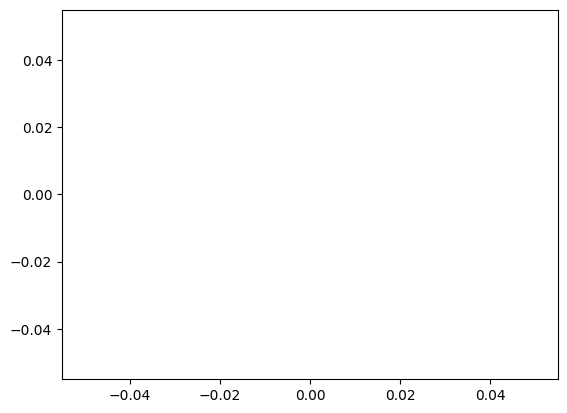

In [ ]:
print(model_d1)
import matplotlib.pyplot as plt

predict_x=norm_data_x

result=predict(predict_x,model_d1)
fig,ax=plt.subplots()
ax.plot(norm_data_y)
ax.plot(result, color='r')
plt.show()

In [ ]:
!pip install backtesting
from backtesting import Backtest,Strategy
from backtesting.lib import crossover

class backtesting(Strategy):
  def init(self):
    super().init()
    Open_price=self.data.Open
    Close_price=self.data.Close
  def next(self):
    for i in range(len(self.data)):
      try:
        if self.data[0][i]>=0.0:
          self.buy()
        else:
          self.sell()
      except:
        pass

bt=Backtest(df_concat["2020-01-01":],backtesting,commission=.002,cash=10000000,exclusive_orders=True)
stats=bt.run()
print(stats)

Start                     2020-01-02 00:00...
End                       2023-11-13 00:00...
Duration                   1411 days 00:00:00
Exposure Time [%]                   99.794661
Equity Final [$]                476349.050652
Equity Peak [$]               10881740.518386
Return [%]                         -95.236509
Buy & Hold Return [%]               95.470136
Return (Ann.) [%]                   -54.50709
Volatility (Ann.) [%]               15.980345
Sharpe Ratio                              0.0
Sortino Ratio                             0.0
Calmar Ratio                              0.0
Max. Drawdown [%]                   -95.66194
Avg. Drawdown [%]                  -31.456619
Max. Drawdown Duration     1331 days 00:00:00
Avg. Drawdown Duration      353 days 00:00:00
# Trades                                  972
Win Rate [%]                        42.695473
Best Trade [%]                       9.717813
Worst Trade [%]                    -10.398537
Avg. Trade [%]                    

In [ ]:
bt.plot()

/usr/local/lib/python3.10/dist-packages/backtesting/_plotting.py:250: UserWarning: DatetimeFormatter scales now only accept a single format. Using the first provided: '%d %b'
  formatter=DatetimeTickFormatter(days=['%d %b', '%a %d'],
/usr/local/lib/python3.10/dist-packages/backtesting/_plotting.py:250: UserWarning: DatetimeFormatter scales now only accept a single format. Using the first provided: '%m/%Y'
  formatter=DatetimeTickFormatter(days=['%d %b', '%a %d'],
/usr/local/lib/python3.10/dist-packages/backtesting/_plotting.py:659: UserWarning: found multiple competing values for 'toolbar.active_drag' property; using the latest value
  fig = gridplot(
/usr/local/lib/python3.10/dist-packages/backtesting/_plotting.py:659: UserWarning: found multiple competing values for 'toolbar.active_scroll' property; using the latest value
  fig = gridplot(


GridPlot(id='p1606', ...)

In [ ]:
df_concat[0].max(),df_concat[0].min(),df_concat[0].mean()

(-0.3206878, -0.36712062, -0.36710888)

In [ ]:
print(df_concat[df_concat[0].isnull()==True][0].index)

Int64Index([4643, 4644, 4645, 4646, 4647, 4648, 4649, 4650, 4651, 4652,
            ...
            4833, 4834, 4835, 4836, 4837, 4838, 4839, 4840, 4841, 4842],
           dtype='int64', length=200)


In [ ]:
df[["Open","Close","High","Low","Volume","sma5","sma20","sma50","sma100","sma200","Volume_d","Open_d","Close_d"]].iloc[1].values

array([ 7.39976406e+00,  7.30063486e+00,  7.46178102e+00,  7.23039913e+00,
        9.76566743e+08,  7.17420912e+00,  6.37128136e+00,  5.57817662e+00,
        5.14277366e+00,  4.51631799e+00, -7.97792764e-02, -5.20911002e-02,
       -7.49288956e-03])

In [ ]:
import numpy
accuracy=0
for i in range(len(test_set_y)):
  if abs(test_set_y[i]-test_pred[i])<=0.1:
    accuracy+=1
print(100*accuracy/len(test_set_y))

26.00574712643678


In [ ]:
np.mean(test_set_y),np.max(test_set_y),np.min(test_set_y)

(2.022600180497217, 2.8183052556617865, 1.063512169467342)

In [ ]:
predict(df[["Open","Close","High","Low","Volume","sma5","sma20","sma50","sma100","sma200","Volume_d","Open_d","Close_d"]].values,model)[0]

-0.3206878

###요일 효과 가중치 비중 확인하기###

In [ ]:
import datetime
for i,j in enumerate(df["Date"]):
  ls=str(j).split(" ")[0].split("-")
  df["weekday"][i]=datetime.date(int(ls[0]),int(ls[1]),int(ls[2])).weekday()

<ipython-input-54-11d1542fe729>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["weekday"][i]=datetime.date(int(ls[0]),int(ls[1]),int(ls[2])).weekday()


In [ ]:
result=predict(df[["Open","Close","sma5","sma20","sma50","sma100","sma200"]].values,model)
df["yhat"]=result
df

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,sma5,sma20,sma50,sma100,sma200,Y,nasdaq,trend,trend_o,weekday,yhat
0,2005-06-06 00:00:00-04:00,7.033387,7.316327,7.019439,7.246339,904413304,0.0,0.0,7.095255,6.287720,5.522535,5.118430,4.493303,7.300635,2075.760010,7.035601,7.048330,4,2.086399
1,2005-06-07 00:00:00-04:00,7.399764,7.461781,7.230399,7.300635,976566743,0.0,0.0,7.174209,6.371281,5.578177,5.142774,4.516318,6.962901,2067.159912,7.046058,7.056148,4,2.995081
2,2005-06-08 00:00:00-04:00,7.293911,7.302379,6.924047,6.962901,1031889331,0.0,0.0,7.132167,6.435740,5.627985,5.163753,4.537509,7.131021,2060.179932,7.056647,7.063957,4,3.294739
3,2005-06-09 00:00:00-04:00,7.091420,7.185567,6.987808,7.131021,660109011,0.0,0.0,7.124246,6.504258,5.680717,5.185257,4.560104,7.036127,2076.909912,7.067657,7.071961,4,3.385628
4,2005-06-10 00:00:00-04:00,7.147958,7.155181,6.974358,7.036127,509767599,0.0,0.0,7.135405,6.571232,5.731522,5.204834,4.582084,7.042354,2063.000000,7.079323,7.080512,4,3.420871
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4637,2023-11-06 00:00:00-05:00,130.220001,131.559998,129.929993,131.449997,15360400,0.0,0.0,128.653999,133.839999,134.825001,130.292000,118.325325,132.399994,13518.780273,130.463087,130.109150,4,3.159601
4638,2023-11-07 00:00:00-05:00,131.979996,133.279999,131.139999,132.399994,19223800,0.0,0.0,130.073997,133.499999,134.837201,130.358100,118.481275,133.259995,13639.860352,130.272346,129.854168,4,3.159759
4639,2023-11-08 00:00:00-05:00,132.360001,133.539993,132.160004,133.259995,15093600,0.0,0.0,131.211996,133.077999,134.792600,130.450100,118.651525,131.690002,13650.410156,130.093870,129.610379,4,3.160083
4640,2023-11-09 00:00:00-05:00,133.360001,133.960007,131.509995,131.690002,17976500,0.0,0.0,131.833997,132.648000,134.687801,130.528500,118.826325,134.059998,13521.450195,129.921883,129.372077,4,3.160387


In [ ]:
df.groupby("weekday").mean().yhat.values

<ipython-input-59-91bacec9e329>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby("weekday").mean().yhat.values


array([3.2292438, 3.230329 , 3.2306788, 3.2301757, 3.230669 ],
      dtype=float32)

<ipython-input-76-c760bee7436c>:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  values=df.groupby("weekday").mean().yhat.values


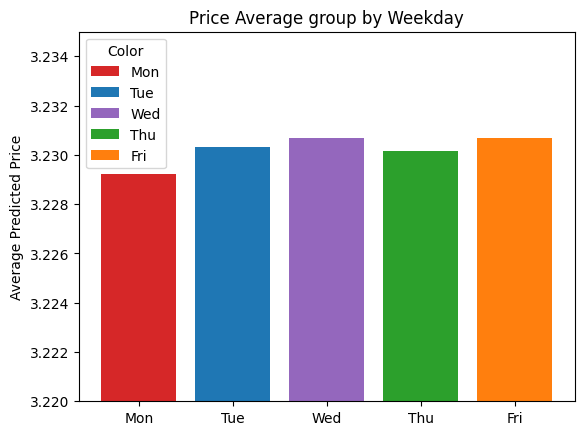

In [ ]:
import matplotlib.pyplot as plt
fig, ax =plt.subplots()
weekday=["Mon","Tue","Wed","Thu","Fri"]
values=df.groupby("weekday").mean().yhat.values
bar_labels = ["Mon","Tue","Wed","Thu","Fri"]
bar_colors = ['tab:red', 'tab:blue','tab:purple', 'tab:green', 'tab:orange']

ax.bar(weekday, values, label=bar_labels, color=bar_colors)
ax.set_ylabel('Average Predicted Price')
ax.set_ylim(3.22,3.235)
ax.set_title('Price Average group by Weekday')
ax.legend(title='Color')

plt.show()

<ipython-input-81-fb1a458dea36>:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  values=df.groupby("weekday").mean().Close.values


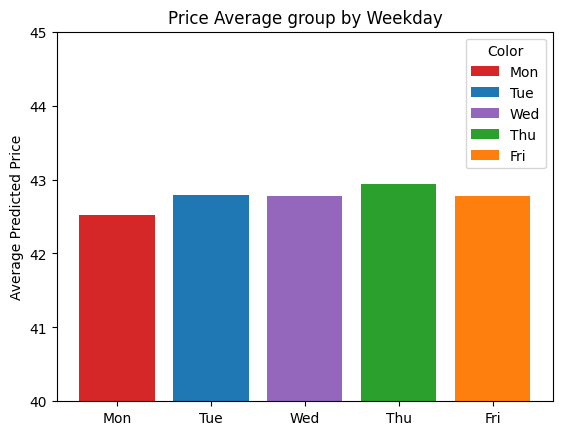

In [ ]:
import matplotlib.pyplot as plt
fig, ax =plt.subplots()
weekday=["Mon","Tue","Wed","Thu","Fri"]
values=df.groupby("weekday").mean().Close.values
bar_labels = ["Mon","Tue","Wed","Thu","Fri"]
bar_colors = ['tab:red', 'tab:blue','tab:purple', 'tab:green', 'tab:orange']

ax.bar(weekday, values, label=bar_labels, color=bar_colors)
ax.set_ylabel('Average Predicted Price')
ax.set_ylim(40,45)
ax.set_title('Price Average group by Weekday')
ax.legend(title='Color')

plt.show()

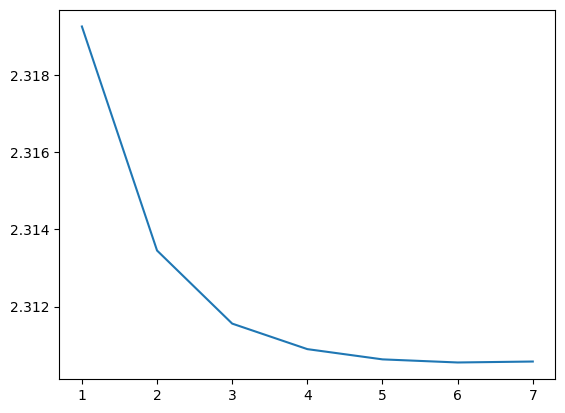

In [ ]:
x=test_set_x[-7:]
ls=[]
for i in range(len(x)):
  x[i][1]+=0.1
  result=predict(x,model)[-1]
  ls.append(result)

fig,ax=plt.subplots()
plus_Day=[7,6,5,4,3,2,1]
ax.plot(plus_Day,ls)
plt.show()

In [ ]:
ls

[2.3105762, 2.3105516, 2.310632, 2.3108974, 2.311558, 2.3134506, 2.3192518]

###trend 변수 대체 혹은 추가 모델###

In [ ]:
def train(model,train_and_valid_data,epochs):
        train_x, train_y, valid_x, valid_y= train_and_valid_data
        train_x, train_y = torch.from_numpy(train_x).float(),torch.from_numpy(train_y).float()
        train_loader=DataLoader(TensorDataset(train_x,train_y),batch_size=32)

        valid_x, valid_y = torch.from_numpy(valid_x).float(),torch.from_numpy(valid_y).float()
        valid_loader=DataLoader(TensorDataset(valid_x,valid_y),batch_size=32)

        device=torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
        model=model.to(device)
        optimizer=torch.optim.Adam(model.parameters(),lr=0.001)
        criterion=torch.nn.MSELoss()
        valid_loss_min=float("inf")
        bad_epoch=0
        global_step=0
        for epoch in range(epochs):
            train_loss_array=[]
            hidden_train=None
            model.train()
            for i, _data in enumerate(train_loader):
                _train_x,_train_y=_data[0].to(device),_data[1].to(device)
                optimizer.zero_grad()
                pred,hidden_train=model(_train_x,hidden_train)

                h_0, c_0 = hidden_train
                h_0.detach_(),c_0.detach_()
                hidden_Train=(h_0,c_0)
            loss=criterion(pred,_train_y)
            loss.backward()
            optimizer.step()
            train_loss_array.append(loss.item())
            global_step+=1
            if global_step%100==0:
                print("epoch: %d loss: %f" %(epoch, loss.item()))

            model.eval()
            valid_loss_array=[]
            hidden_valid=None
            for _valid_x,_valid_y in valid_loader:
                _valid_x,_valid_y=_valid_x.to(device),_valid_y.to(device)
                pred,hidden_valid=model(_valid_x,hidden_valid)
                loss=criterion(pred,_valid_y)
                valid_loss_array.append(loss.item())

            train_loss_cur=np.mean(train_loss_array)
            valid_loss_cur=np.mean(valid_loss_array)
            print("train loss: %f valid loss: %f" % (train_loss_cur,valid_loss_cur))
            if valid_loss_cur<valid_loss_min:
                valid_loss_min=valid_loss_cur
                bad_epoch=0
            else:
                bad_epoch+=1
                if bad_epoch>=10:
                    torch.save(model.state_dict(),"/content/drive/MyDrive/lstm_trend.pt")
                    print("Training stops early in epoch {}".format(epoch))
                    break
            torch.save(model.state_dict(),"/content/drive/MyDrive/lstm_trend.pt")

def predict(x,model):
    test_x=torch.from_numpy(x).float()
    test_set=TensorDataset(test_x)
    test_loader=DataLoader(test_set,batch_size=1)

    device=torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
    result=torch.Tensor().to(device)
    model.eval()
    hidden_predict=None
    for _data in test_loader:
        data_x=_data[0].to(device)
        pred,hidden_predict=model(data_x,hidden_predict)
        cur_pred=torch.squeeze(pred,dim=0)
        result=torch.cat((result,cur_pred),dim=0)

    return result.detach().cpu().numpy()

In [ ]:
import numpy as np
train_data_rate=0.85
valid_data_rate=0.15

data_x=df[["trend","trend_o","High","Low","Volume","sma5","sma20","sma50","sma100","sma200","Volume_d","Open_d","Close_d"]]
data_y=df[["Y"]]
data_columns=[*data_x.columns]
data_x=np.asarray(data_x)
data_y=np.asarray(data_y)
data_num=data_x.shape[0] #row
train_num=int(data_num*train_data_rate)

data_mean=np.mean(data_x,axis=0)
data_std=np.std(data_x,axis=0)
norm_data_x=(data_x.data-data_mean)/data_std
norm_data_y=(data_y-data_y.mean())/data_y.std()

predict_day=1
time_step=20
epoch=20
train_set_x=norm_data_x[:train_num]
test_set_x=norm_data_x[train_num:]
train_set_y=norm_data_y[:train_num]
test_set_y=norm_data_y[train_num:]

In [ ]:
from sklearn.model_selection import train_test_split
feature_data=train_set_x
label_data=train_set_y
train_x = [feature_data[start_index + i*time_step : start_index + (i+1)*time_step]
            for start_index in range(0,time_step,5)
            for i in range((train_num - start_index) // time_step)]
train_y = [label_data[start_index + i*time_step : start_index + (i+1)*time_step]
            for start_index in range(0,time_step,5)
            for i in range((train_num - start_index) // time_step)]
train_x, train_y = np.array(train_x), np.array(train_y)
train_x, valid_x, train_y, valid_y = train_test_split(train_x, train_y, test_size=valid_data_rate,
                                                              random_state=1234,
                                                              shuffle=True)
train_and_valid_data=(train_x,train_y,valid_x,valid_y)

In [ ]:
model_filter=Deep_lstm(13,64,0.2,1,1)
epochs=100
train(model_filter,train_and_valid_data,epochs)

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/rnn.py:82: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.2 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "


train loss: 0.349712 valid loss: 0.365665
train loss: 0.326826 valid loss: 0.340748
train loss: 0.305236 valid loss: 0.317215
train loss: 0.284878 valid loss: 0.294994
train loss: 0.265697 valid loss: 0.274040
train loss: 0.247660 valid loss: 0.254346
train loss: 0.230764 valid loss: 0.235956
train loss: 0.215044 valid loss: 0.218968
train loss: 0.200579 valid loss: 0.203550
train loss: 0.187501 valid loss: 0.189944
train loss: 0.175996 valid loss: 0.178472
train loss: 0.166311 valid loss: 0.169503
train loss: 0.158719 valid loss: 0.163329
train loss: 0.153428 valid loss: 0.159880
train loss: 0.150350 valid loss: 0.158363
train loss: 0.148819 valid loss: 0.157370
train loss: 0.147678 valid loss: 0.155635
train loss: 0.145878 valid loss: 0.152578
train loss: 0.142937 valid loss: 0.148255
train loss: 0.138905 valid loss: 0.143049
train loss: 0.134108 valid loss: 0.137421
train loss: 0.128933 valid loss: 0.131755
train loss: 0.123705 valid loss: 0.126310
train loss: 0.118644 valid loss: 0

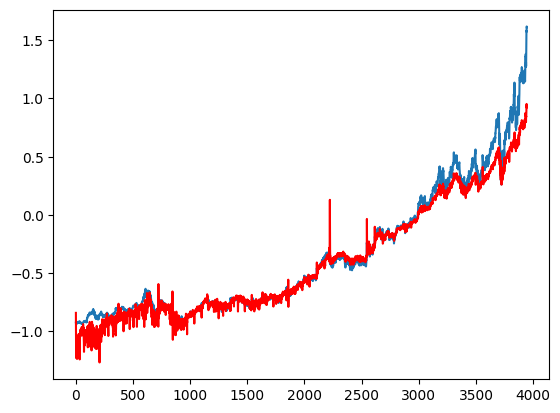

In [ ]:
import matplotlib.pyplot as plt

result=predict(train_set_x,model_filter)
fig,ax=plt.subplots()
ax.plot(train_set_y)
ax.plot(result, color='r')
plt.show()

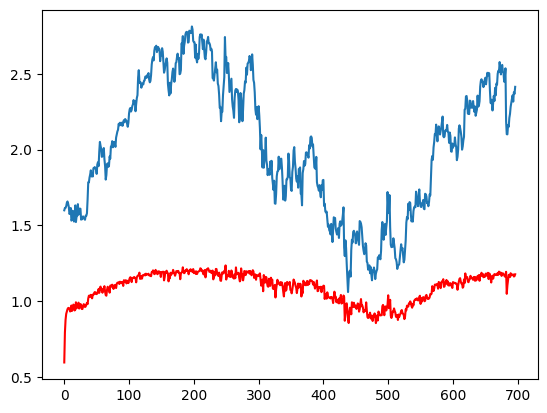

In [ ]:
import matplotlib.pyplot as plt

result=predict(test_set_x,model_filter)
fig,ax=plt.subplots()
ax.plot(test_set_y)
ax.plot(result, color='r')
plt.show()

In [ ]:
criterion=torch.nn.MSELoss()
test_pred=predict(test_set_x,model_filter)
np.sum((test_pred-test_set_y)**2)/len(test_set_y)

745.2531201693891

In [ ]:
import numpy as np
train_data_rate=0.85
valid_data_rate=0.15

data_x=df[["Open","Close","trend","trend_o","High","Low","Volume","sma5","sma20","sma50","sma100","sma200","Volume_d","Open_d","Close_d"]]
data_y=df[["Y"]]
data_columns=[*data_x.columns]
data_x=np.asarray(data_x)
data_y=np.asarray(data_y)
data_num=data_x.shape[0] #row
train_num=int(data_num*train_data_rate)

data_mean=np.mean(data_x,axis=0)
data_std=np.std(data_x,axis=0)
norm_data_x=(data_x.data-data_mean)/data_std
norm_data_y=(data_y-data_y.mean())/data_y.std()

predict_day=1
time_step=20
epoch=20
train_set_x=norm_data_x[:train_num]
test_set_x=norm_data_x[train_num:]
train_set_y=norm_data_y[:train_num]
test_set_y=norm_data_y[train_num:]

In [ ]:
from sklearn.model_selection import train_test_split
feature_data=train_set_x
label_data=train_set_y
train_x = [feature_data[start_index + i*time_step : start_index + (i+1)*time_step]
            for start_index in range(0,time_step,5)
            for i in range((train_num - start_index) // time_step)]
train_y = [label_data[start_index + i*time_step : start_index + (i+1)*time_step]
            for start_index in range(0,time_step,5)
            for i in range((train_num - start_index) // time_step)]
train_x, train_y = np.array(train_x), np.array(train_y)
train_x, valid_x, train_y, valid_y = train_test_split(train_x, train_y, test_size=valid_data_rate,
                                                              random_state=1234,
                                                              shuffle=True)
train_and_valid_data=(train_x,train_y,valid_x,valid_y)

In [ ]:
model_filter_9=Deep_lstm(15,64,0.2,1,1)
epochs=100
train(model_filter_9,train_and_valid_data,epochs)

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/rnn.py:82: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.2 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "


train loss: 0.291975 valid loss: 0.303104
train loss: 0.272714 valid loss: 0.282042
train loss: 0.254973 valid loss: 0.262622
train loss: 0.238664 valid loss: 0.244779
train loss: 0.223726 valid loss: 0.228476
train loss: 0.210127 valid loss: 0.213708
train loss: 0.197856 valid loss: 0.200500
train loss: 0.186924 valid loss: 0.188905
train loss: 0.177355 valid loss: 0.178980
train loss: 0.169173 valid loss: 0.170756
train loss: 0.162370 valid loss: 0.164171
train loss: 0.156855 valid loss: 0.158989
train loss: 0.152401 valid loss: 0.154793
train loss: 0.148641 valid loss: 0.151073
train loss: 0.145148 valid loss: 0.147378
train loss: 0.141556 valid loss: 0.143417
train loss: 0.137640 valid loss: 0.139074
train loss: 0.133320 valid loss: 0.134363
train loss: 0.128625 valid loss: 0.129372
train loss: 0.123644 valid loss: 0.124218
train loss: 0.118484 valid loss: 0.119012
train loss: 0.113251 valid loss: 0.113845
train loss: 0.108029 valid loss: 0.108780
train loss: 0.102879 valid loss: 0

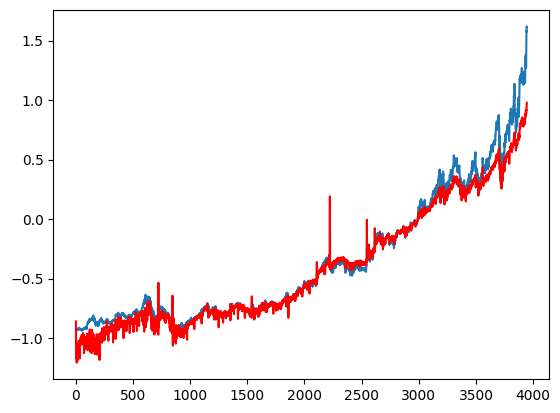

In [ ]:
import matplotlib.pyplot as plt

result=predict(train_set_x,model_filter_9)
fig,ax=plt.subplots()
ax.plot(train_set_y)
ax.plot(result, color='r')
plt.show()

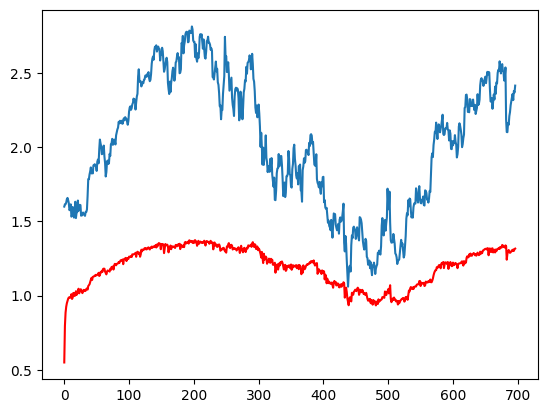

In [ ]:
import matplotlib.pyplot as plt

result=predict(test_set_x,model_filter_9)
fig,ax=plt.subplots()
ax.plot(test_set_y)
ax.plot(result, color='r')
plt.show()

In [ ]:
criterion=torch.nn.MSELoss()
test_pred=predict(test_set_x,model_filter_9)
np.sum((test_pred-test_set_y)**2)/len(test_set_y)

624.2572597980651

###로그차분###

<ipython-input-48-2fca0b14366f>:2: RuntimeWarning: invalid value encountered in log
  plt.plot(x,np.log(x))


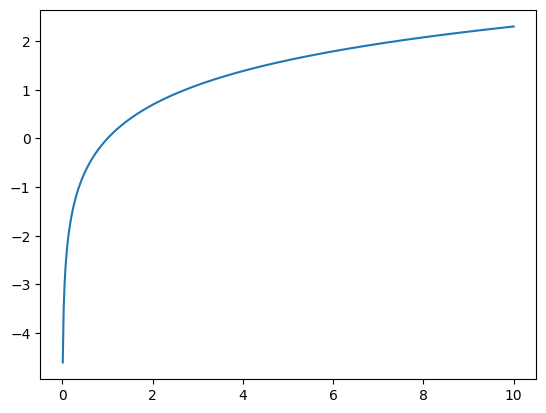

In [ ]:

x=np.linspace(-10,10,1000)
plt.plot(x,np.log(x))
plt.show()


In [ ]:
import numpy as np
df["Open_lag"]=np.log(df["Open"]).shift(-1)
df["Close_lag"]=np.log(df["Close"]).shift(-1)
df["Open_d"]=df["Open_lag"]-np.log(df["Open"])
df["Close_d"]=df["Close_lag"]-np.log(df["Close"])
df.reset_index(drop=True,inplace=True)
df_d=df.drop(len(df)-1)
df_d

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,sma5,sma20,...,sma100,sma200,Y,nasdaq,trend,trend_o,Open_lag,Close_lag,Open_d,Close_d
0,2005-06-06 00:00:00-04:00,7.033387,7.316327,7.019439,7.246339,904413304,0.0,0.0,7.095255,6.287720,...,5.118430,4.493303,7.300635,2075.760010,6.878466,6.868524,2.001448,1.987961,0.050780,0.007465
1,2005-06-07 00:00:00-04:00,7.399764,7.461781,7.230399,7.300635,976566743,0.0,0.0,7.174209,6.371281,...,5.142774,4.516318,6.962901,2067.159912,6.897095,6.887317,1.987040,1.940596,-0.014408,-0.047365
2,2005-06-08 00:00:00-04:00,7.293911,7.302379,6.924047,6.962901,1031889331,0.0,0.0,7.132167,6.435740,...,5.163753,4.537509,7.131021,2060.179932,6.915725,6.906110,1.958886,1.964454,-0.028154,0.023858
3,2005-06-09 00:00:00-04:00,7.091420,7.185567,6.987808,7.131021,660109011,0.0,0.0,7.124246,6.504258,...,5.185257,4.560104,7.036127,2076.909912,6.934354,6.924903,1.966827,1.951058,0.007941,-0.013397
4,2005-06-10 00:00:00-04:00,7.147958,7.155181,6.974358,7.036127,509767599,0.0,0.0,7.135405,6.571232,...,5.204834,4.582084,7.042354,2063.000000,6.952984,6.943696,1.941526,1.951943,-0.025301,0.000885
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4637,2023-11-06 00:00:00-05:00,130.220001,131.559998,129.929993,131.449997,15360400,0.0,0.0,128.653999,133.839999,...,130.292000,118.325325,132.399994,13518.780273,138.858225,138.714562,4.882650,4.885828,0.013425,0.007201
4638,2023-11-07 00:00:00-05:00,131.979996,133.279999,131.139999,132.399994,19223800,0.0,0.0,130.073997,133.499999,...,130.358100,118.481275,133.259995,13639.860352,139.069330,138.926506,4.885525,4.892302,0.002875,0.006474
4639,2023-11-08 00:00:00-05:00,132.360001,133.539993,132.160004,133.259995,15093600,0.0,0.0,131.211996,133.077999,...,130.450100,118.651525,131.690002,13650.410156,139.280429,139.138443,4.893052,4.880451,0.007527,-0.011851
4640,2023-11-09 00:00:00-05:00,133.360001,133.960007,131.509995,131.690002,17976500,0.0,0.0,131.833997,132.648000,...,130.528500,118.826325,134.059998,13521.450195,139.491524,139.350376,4.879235,4.898287,-0.013817,0.017837


In [ ]:
df_d["Y_d"]=df_d["Close_d"].shift(-1)
df_d=df_d.drop(len(df_d)-1)
df_d.tail()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,sma5,sma20,...,sma200,Y,nasdaq,trend,trend_o,Open_lag,Close_lag,Open_d,Close_d,Y_d
4636,2023-11-03 00:00:00-04:00,129.089996,130.729996,129.009995,130.369995,19517900,0.0,0.0,127.514000,134.242500,...,118.164475,131.449997,13478.280273,138.647112,138.502608,4.869225,4.878627,0.008716,0.008250,0.007201
4637,2023-11-06 00:00:00-05:00,130.220001,131.559998,129.929993,131.449997,15360400,0.0,0.0,128.653999,133.839999,...,118.325325,132.399994,13518.780273,138.858225,138.714562,4.882650,4.885828,0.013425,0.007201,0.006474
4638,2023-11-07 00:00:00-05:00,131.979996,133.279999,131.139999,132.399994,19223800,0.0,0.0,130.073997,133.499999,...,118.481275,133.259995,13639.860352,139.069330,138.926506,4.885525,4.892302,0.002875,0.006474,-0.011851
4639,2023-11-08 00:00:00-05:00,132.360001,133.539993,132.160004,133.259995,15093600,0.0,0.0,131.211996,133.077999,...,118.651525,131.690002,13650.410156,139.280429,139.138443,4.893052,4.880451,0.007527,-0.011851,0.017837
4640,2023-11-09 00:00:00-05:00,133.360001,133.960007,131.509995,131.690002,17976500,0.0,0.0,131.833997,132.648000,...,118.826325,134.059998,13521.450195,139.491524,139.350376,4.879235,4.898287,-0.013817,0.017837,-0.003138


In [ ]:
import numpy as np
train_data_rate=0.85
valid_data_rate=0.15

data_x=df_d[["Open_d","Close_d","sma5","sma20","sma50","sma100","sma200"]]
data_y=df_d[["Y_d"]]
data_columns=[*data_x.columns]
data_x=np.asarray(data_x)
data_y=np.asarray(data_y)
data_num=data_x.shape[0] #row
train_num=int(data_num*train_data_rate)

data_mean=np.mean(data_x,axis=0)
data_std=np.std(data_x,axis=0)
norm_data_x=(data_x.data-data_mean)/data_std
norm_data_y=(data_y-data_y.mean())/data_y.std()

predict_day=1
time_step=100
epoch=20
train_set_x=norm_data_x[:train_num]
test_set_x=norm_data_x[train_num:]
train_set_y=norm_data_y[:train_num]
test_set_y=norm_data_y[train_num:]

In [ ]:
from sklearn.model_selection import train_test_split
feature_data=train_set_x
label_data=train_set_y
train_x = [feature_data[start_index + i*time_step : start_index + (i+1)*time_step]
            for start_index in range(0,time_step,20)
            for i in range((train_num - start_index) // time_step)]
train_y = [label_data[start_index + i*time_step : start_index + (i+1)*time_step]
            for start_index in range(0,time_step,20)
            for i in range((train_num - start_index) // time_step)]
train_x, train_y = np.array(train_x), np.array(train_y)
train_x, valid_x, train_y, valid_y = train_test_split(train_x, train_y, test_size=valid_data_rate,
                                                              random_state=1234,
                                                              shuffle=True)
train_and_valid_data=(train_x,train_y,valid_x,valid_y)

In [ ]:
model=Deep_lstm(7,64,0.2,1,2)
epochs=100
train(model,train_and_valid_data,epochs)

train loss: 1.925275 valid loss: 0.918364
train loss: 1.922818 valid loss: 0.916672
train loss: 1.920482 valid loss: 0.915467
train loss: 1.918742 valid loss: 0.915036
train loss: 1.919037 valid loss: 0.915277
train loss: 1.917035 valid loss: 0.916161
train loss: 1.916052 valid loss: 0.917773
train loss: 1.914741 valid loss: 0.920071
train loss: 1.914159 valid loss: 0.923057
train loss: 1.909975 valid loss: 0.926764
train loss: 1.909908 valid loss: 0.931093
train loss: 1.906999 valid loss: 0.936172
train loss: 1.907990 valid loss: 0.941872
train loss: 1.905413 valid loss: 0.948036
Training stops early in epoch 13


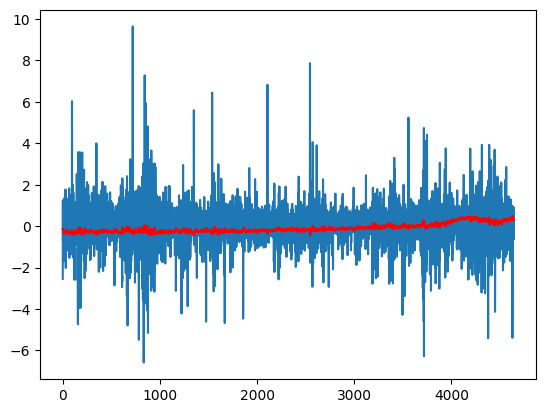

In [ ]:
import matplotlib.pyplot as plt

predict_x=norm_data_x

result=predict(predict_x,model)
fig,ax=plt.subplots()
ax.plot(norm_data_y)
ax.plot(result, color='r')
plt.show()

재무데이터

In [ ]:
import yfinance as yf
ticker=yf.Ticker("GOOG")
google_fin=ticker.financials

In [ ]:
ticker.balancesheet

,2022-12-31,2021-12-31,2020-12-31,2019-12-31
Ordinary Shares Number,12849000000.0,13242420000.0,13504440000.0,13766700000.0
Share Issued,12849000000.0,13242420000.0,13504440000.0,13766700000.0
Total Debt,27202000000.0,26206000000.0,25078000000.0,14768000000.0
Tangible Book Value,225100000000.0,227262000000.0,199924000000.0,178839000000.0
Invested Capital,270845000000.0,266452000000.0,236476000000.0,205996000000.0
...,...,...,...,...
Allowance For Doubtful Accounts Receivable,-754000000.0,-550000000.0,-753000000.0,-753000000.0
Gross Accounts Receivable,41012000000.0,39854000000.0,31683000000.0,26079000000.0
Cash Cash Equivalents And Short Term Investments,113762000000.0,139649000000.0,136694000000.0,119675000000.0
Other Short Term Investments,91883000000.0,118704000000.0,110229000000.0,101177000000.0


In [ ]:
ticker.financials.info()

<class 'pandas.core.frame.DataFrame'>
Index: 49 entries, Tax Effect Of Unusual Items to Operating Revenue
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   2022-12-31 00:00:00  46 non-null     object
 1   2021-12-31 00:00:00  47 non-null     object
 2   2020-12-31 00:00:00  47 non-null     object
 3   2019-12-31 00:00:00  49 non-null     object
dtypes: object(4)
memory usage: 1.9+ KB


###LSTM 2개 연결하기###

In [ ]:
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset
import numpy as np

#model=Deep_lstm(7,128,0.2,1,2)
class Deep_lstm_2(nn.Module):
    def __init__(self,input_dim,hidden_dim,dropout_rate,output_dim,num_layer):
        """
        (batch,num_feature, data)
        => (batch,7,20)의 데이터를 단위로 train
        hidden size 128
        layer 2개 쌓자
        """
        super(Deep_lstm_2,self).__init__()
        self.input_dim=input_dim
        self.hidden_dim=hidden_dim
        self.num_layer=num_layer
        self.dropout_rate=dropout_rate
        self.output_dim=output_dim
        self.lstm_1=nn.LSTM(input_size=self.input_dim,hidden_size=self.hidden_dim,
                         num_layers=self.num_layer,batch_first=False,dropout=self.dropout_rate)
        self.lstm_2=nn.LSTM(input_size=self.hidden_dim,hidden_size=self.hidden_dim,
                            num_layers=self.num_layer,batch_first=False,dropout=self.dropout_rate)
        self.linear=nn.Linear(in_features=self.hidden_dim,out_features=self.output_dim)

    def forward(self,x,hidden=None):
        lstm_out_1,hidden=self.lstm_1(x,hidden)
        lstm_out_2,hidden=self.lstm_2(lstm_out_1,hidden)
        linear_out=self.linear(lstm_out_2)
        return linear_out, hidden

In [ ]:
def train(model,train_and_valid_data,epochs):
        train_x, train_y, valid_x, valid_y= train_and_valid_data
        train_x, train_y = torch.from_numpy(train_x).float(),torch.from_numpy(train_y).float()
        train_loader=DataLoader(TensorDataset(train_x,train_y),batch_size=32)

        valid_x, valid_y = torch.from_numpy(valid_x).float(),torch.from_numpy(valid_y).float()
        valid_loader=DataLoader(TensorDataset(valid_x,valid_y),batch_size=32)

        device=torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
        model=model.to(device)
        optimizer=torch.optim.Adam(model.parameters(),lr=0.001)
        criterion=torch.nn.MSELoss()
        valid_loss_min=float("inf")
        bad_epoch=0
        global_step=0
        for epoch in range(epochs):
            train_loss_array=[]
            hidden_train=None
            model.train()
            for i, _data in enumerate(train_loader):
                _train_x,_train_y=_data[0].to(device),_data[1].to(device)
                optimizer.zero_grad()
                pred,hidden_train=model(_train_x,hidden_train)

                h_0, c_0 = hidden_train
                h_0.detach_(),c_0.detach_()
                hidden_Train=(h_0,c_0)
            loss=criterion(pred,_train_y)
            loss.backward()
            optimizer.step()
            train_loss_array.append(loss.item())
            global_step+=1
            if global_step%100==0:
                print("epoch: %d loss: %f" %(epoch, loss.item()))

            model.eval()
            valid_loss_array=[]
            hidden_valid=None
            for _valid_x,_valid_y in valid_loader:
                _valid_x,_valid_y=_valid_x.to(device),_valid_y.to(device)
                pred,hidden_valid=model(_valid_x,hidden_valid)
                loss=criterion(pred,_valid_y)
                valid_loss_array.append(loss.item())

            train_loss_cur=np.mean(train_loss_array)
            valid_loss_cur=np.mean(valid_loss_array)
            print("train loss: %f valid loss: %f" % (train_loss_cur,valid_loss_cur))
            if valid_loss_cur<valid_loss_min:
                valid_loss_min=valid_loss_cur
                bad_epoch=0
            else:
                bad_epoch+=1
                if bad_epoch>=10:
                    torch.save(model.state_dict(),"/content/drive/MyDrive/lstm_2.pt")
                    print("Training stops early in epoch {}".format(epoch))
                    break
            torch.save(model.state_dict(),"/content/drive/MyDrive/lstm_2.pt")

def predict(x,model):
    test_x=torch.from_numpy(x).float()
    test_set=TensorDataset(test_x)
    test_loader=DataLoader(test_set,batch_size=1)

    device=torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
    result=torch.Tensor().to(device)
    model.eval()
    hidden_predict=None
    for _data in test_loader:
        data_x=_data[0].to(device)
        pred,hidden_predict=model(data_x,hidden_predict)
        cur_pred=torch.squeeze(pred,dim=0)
        result=torch.cat((result,cur_pred),dim=0)

    return result.detach().cpu().numpy()

In [ ]:
import numpy as np
train_data_rate=0.85
valid_data_rate=0.15

data_x=df[["Open","Close","High","Low","Volume","sma5","sma20","sma50","sma100","sma200"]]
data_y=df[["Y"]]
data_columns=[*data_x.columns]
data_x=np.asarray(data_x)
data_y=np.asarray(data_y)
data_num=data_x.shape[0] #row
train_num=int(data_num*train_data_rate)

data_mean=np.mean(data_x,axis=0)
data_std=np.std(data_x,axis=0)
norm_data_x=(data_x.data-data_mean)/data_std
norm_data_y=(data_y-data_y.mean())/data_y.std()

predict_day=1
time_step=20
epoch=20
train_set_x=norm_data_x[:train_num]
test_set_x=norm_data_x[train_num:]
train_set_y=norm_data_y[:train_num]
test_set_y=norm_data_y[train_num:]

In [ ]:
from sklearn.model_selection import train_test_split
feature_data=train_set_x
label_data=train_set_y
train_x = [feature_data[start_index + i*time_step : start_index + (i+1)*time_step]
            for start_index in range(0,time_step)
            for i in range((train_num - start_index) // time_step)]
train_y = [label_data[start_index + i*time_step : start_index + (i+1)*time_step]
            for start_index in range(0,time_step)
            for i in range((train_num - start_index) // time_step)]
train_x, train_y = np.array(train_x), np.array(train_y)
train_x, valid_x, train_y, valid_y = train_test_split(train_x, train_y, test_size=valid_data_rate,
                                                              random_state=1234,
                                                              shuffle=True)
train_and_valid_data=(train_x,train_y,valid_x,valid_y)

In [ ]:
model=Deep_lstm_2(10,64,0.5,1,2)
epochs=300
train(model,train_and_valid_data,epochs)

train loss: 0.278370 valid loss: 0.365798
train loss: 0.270650 valid loss: 0.355318
train loss: 0.264794 valid loss: 0.346016
train loss: 0.259298 valid loss: 0.337881
train loss: 0.255638 valid loss: 0.331005
train loss: 0.250786 valid loss: 0.325468
train loss: 0.247784 valid loss: 0.321398
train loss: 0.245696 valid loss: 0.318775
train loss: 0.242343 valid loss: 0.317312
train loss: 0.240513 valid loss: 0.316758
train loss: 0.236570 valid loss: 0.316934
train loss: 0.231738 valid loss: 0.317821
train loss: 0.228995 valid loss: 0.319620
train loss: 0.221627 valid loss: 0.322625
train loss: 0.214537 valid loss: 0.327369
train loss: 0.206603 valid loss: 0.334785
train loss: 0.197513 valid loss: 0.346194
train loss: 0.185102 valid loss: 0.363575
train loss: 0.173430 valid loss: 0.388879
train loss: 0.161938 valid loss: 0.423568
Training stops early in epoch 19


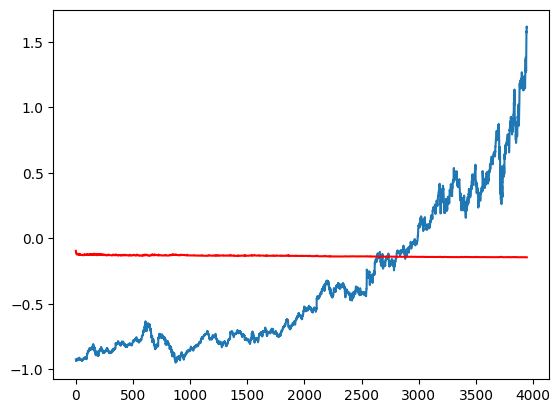

In [ ]:
import matplotlib.pyplot as plt

result=predict(train_set_x,model)
fig,ax=plt.subplots()
ax.plot(train_set_y)
ax.plot(result, color='r')
plt.show()

In [ ]:
criterion=torch.nn.MSELoss()
test_pred=predict(test_set_x,model)
np.sum((test_pred-test_set_y)**2)/len(test_set_y)

6266385.109686912

### DAE ###

In [ ]:
import os

import torch
from torch import nn
from torch.autograd import Variable
from torch.utils.data import DataLoader
from torchvision import transforms
from torchvision.datasets import MNIST
from torchvision.utils import save_image

class autoencoder(nn.Module):
    def __init__(self):
        super(autoencoder, self).__init__()
        self.encoder = nn.Sequential(
            nn.Linear(28 * 28, 256),
            nn.ReLU(True),
            nn.Linear(256, 64),
            nn.ReLU(True))
        self.decoder = nn.Sequential(
            nn.Linear(64, 256),
            nn.ReLU(True),
            nn.Linear(256, 28 * 28),
            nn.Sigmoid())

    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x

class Autoencoder(nn.Module):
    def __init__(self):
        super().__init__()
        self.lin1 = nn.Linear(784,256)
        self.relu = nn.ReLU(True)
        self.lin2 = nn.Linear(256,64)
        self.lin3 = nn.Linear(64,256)
        self.lin4 = nn.Linear(256,784)
        self.sig = nn.Sigmoid()

    def forward(self, x):
        x = self.relu(self.lin1(x))
        x = self.relu(self.lin2(x))
        x = self.relu(self.lin3(x))
        x = self.sig(self.lin4(x))
        return x

def min_max_normalization(tensor, min_value, max_value):
    min_tensor = tensor.min()
    tensor = (tensor - min_tensor)
    max_tensor = tensor.max()
    tensor = tensor / max_tensor
    tensor = tensor * (max_value - min_value) + min_value
    return tensor


def addNoise(img):
    """Adds Gaussian Noise to input image"""
    return img + torch.randn_like(img)*4e-1


if __name__ == "__main__":
    # Training hyper parameters
    epochs = 200
    bs = 128
    lr = 1e-3
    model = Autoencoder().cpu()
    optimizer = torch.optim.Adam(model.parameters(), lr=lr, weight_decay=1e-5)
    criterion = nn.MSELoss()

    dataset = MNIST('./data', transform=transforms.Compose([transforms.ToTensor(),transforms.Lambda(lambda tensor:min_max_normalization(tensor, 0, 1)),transforms.Lambda(lambda x:torch.round(x))]), download=True)
    dataloader = DataLoader(dataset, batch_size=bs, shuffle=True)

    for epoch in range(epochs):
        running_loss = 0.
        for data in dataloader:
            optimizer.zero_grad()
            y = data[0].reshape(data[0].size(0), -1)
            x = addNoise(y)
            y_hat = model.forward(x)
            loss = criterion(y_hat, y)
            running_loss += loss.item()
            loss.backward()
            optimizer.step()
        save_image(x.reshape(-1,1,28,28), f"image/x_{epoch}.png")
        save_image(y_hat.reshape(-1,1,28,28), f"image/y_hat_{epoch}.png")
        print(f'Epoch:{epoch+1}/{epochs}, Loss: {running_loss/len(dataloader)}')

    for i, data in enumerate(dataloader):
        y = data[0].reshape(data[0].size(0), -1)
        x = addNoise(y)
        y_hat = model.forward(x)
        y_hat = y_hat.reshape(-1,1,28,28)
        #save_image(data, f"./image/y_{i+1}.png")
        save_image(y_hat, f"image/y_hat_{i+1}.png")
        break

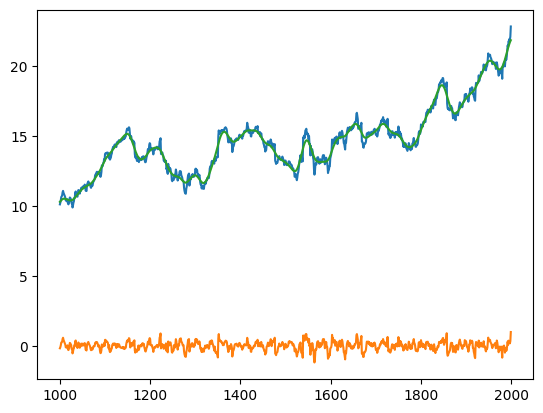

In [ ]:
google_decomp.reset_index(drop=True,inplace=True)

fig,ax=plt.subplots()

ax.plot(google_decomp[1000:2000].index, google_decomp.values[1000:2000])
#ax.plot(google_decomp.cycle)
#ax.plot()

plt.show()


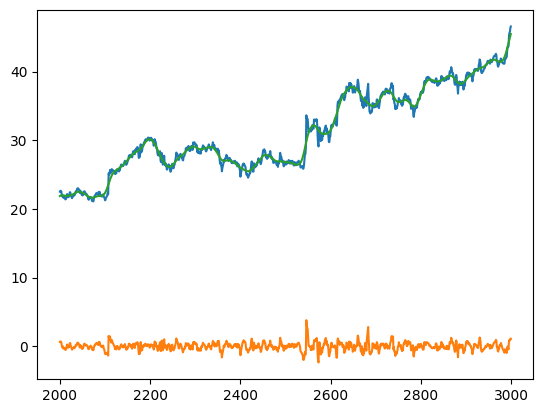

In [ ]:
i=2000
n=1000
fig,ax=plt.subplots()

ax.plot(google_decomp[i:i+n].index, google_decomp.values[i:i+n])
#ax.plot(google_decomp.cycle)
#ax.plot()

plt.show()


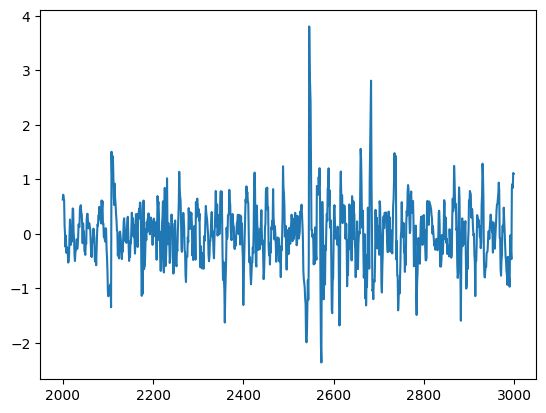

In [ ]:
i=2000
n=1000
fig,ax=plt.subplots()

ax.plot(google_decomp[i:i+n].index, google_decomp.cycle[i:i+n])
#ax.plot(google_decomp.cycle)
#ax.plot()

plt.show()


### Nasdaq###

In [ ]:
import yfinance as yf
#vix=yf.Ticker("^VIX") #구글
#nasdaq_vol=yf.Ticker("^VXN") #NASDAQ
#google=yf.Ticker("GOOG")


def preprocess(name,ticker):
  name=yf.Ticker(ticker)
  hist=name.history(period="max")
  hist["Close_lag"]=hist["Close"].shift(1)
  hist["Close_d"]=(hist["Close_lag"]-hist["Close"])/hist["Close_lag"]
  hist.reset_index(inplace=True)
  hist=hist[hist["Date"]>"2004-08-19"]
  hist.reset_index(drop=True,inplace=True)
  if ticker=="GOOG":
    hist["Y"]=hist["Close"].shift(-1) #하루 이후의 종가 데이터가 종속변수
    hist=hist.drop(len(hist)-1)
  return hist

In [ ]:
google=preprocess("google","GOOG")
nasdaq_vol=preprocess("nasdaq_vol","^VXN")
vix=preprocess("vix","^VIX")

google

In [ ]:
def train(model,train_and_valid_data,epochs):
        train_x, train_y, valid_x, valid_y= train_and_valid_data
        train_x, train_y = torch.from_numpy(train_x).float(),torch.from_numpy(train_y).float()
        train_loader=DataLoader(TensorDataset(train_x,train_y),batch_size=32)

        valid_x, valid_y = torch.from_numpy(valid_x).float(),torch.from_numpy(valid_y).float()
        valid_loader=DataLoader(TensorDataset(valid_x,valid_y),batch_size=32)

        device=torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
        model=model.to(device)
        optimizer=torch.optim.Adam(model.parameters(),lr=0.001)
        criterion=torch.nn.MSELoss()
        valid_loss_min=float("inf")
        bad_epoch=0
        global_step=0
        for epoch in range(epochs):
            train_loss_array=[]
            hidden_train=None
            model.train()
            for i, _data in enumerate(train_loader):
                _train_x,_train_y=_data[0].to(device),_data[1].to(device)
                optimizer.zero_grad()
                pred,hidden_train=model(_train_x,hidden_train)

                h_0, c_0 = hidden_train
                h_0.detach_(),c_0.detach_()
                hidden_Train=(h_0,c_0)
            loss=criterion(pred,_train_y)
            loss.backward()
            optimizer.step()
            train_loss_array.append(loss.item())
            global_step+=1
            if global_step%100==0:
                print("epoch: %d loss: %f" %(epoch, loss.item()))

            model.eval()
            valid_loss_array=[]
            hidden_valid=None
            for _valid_x,_valid_y in valid_loader:
                _valid_x,_valid_y=_valid_x.to(device),_valid_y.to(device)
                pred,hidden_valid=model(_valid_x,hidden_valid)
                loss=criterion(pred,_valid_y)
                valid_loss_array.append(loss.item())

            train_loss_cur=np.mean(train_loss_array)
            valid_loss_cur=np.mean(valid_loss_array)
            print("train loss: %f valid loss: %f" % (train_loss_cur,valid_loss_cur))
            if valid_loss_cur<valid_loss_min:
                valid_loss_min=valid_loss_cur
                bad_epoch=0
            else:
                bad_epoch+=1
                if bad_epoch>=10:
                    torch.save(model.state_dict(),"/content/drive/MyDrive/lstm_other.pt")
                    print("Training stops early in epoch {}".format(epoch))
                    break
            torch.save(model.state_dict(),"/content/drive/MyDrive/lstm_other.pt")

def predict(x,model):
    test_x=torch.from_numpy(x).float()
    test_set=TensorDataset(test_x)
    test_loader=DataLoader(test_set,batch_size=1)

    device=torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
    result=torch.Tensor().to(device)
    model.eval()
    hidden_predict=None
    for _data in test_loader:
        data_x=_data[0].to(device)
        pred,hidden_predict=model(data_x,hidden_predict)
        cur_pred=torch.squeeze(pred,dim=0)
        result=torch.cat((result,cur_pred),dim=0)

    return result.detach().cpu().numpy()

In [ ]:
df=pd.concat([nasdaq_vol[["Close_d","Volume"]],vix[["Close_d","Volume"]]],axis=1)

In [ ]:
import numpy as np
train_data_rate=0.85
valid_data_rate=0.15

data_x=df
data_y=google[["Y"]]
data_columns=[*data_x.columns]
data_x=np.asarray(data_x)
data_y=np.asarray(data_y)
data_num=data_x.shape[0] #row
train_num=int(data_num*train_data_rate)

#data_mean=np.mean(data_x,axis=0)
#data_std=np.std(data_x,axis=0)
#norm_data_x=(data_x.data-data_mean)/data_std
#norm_data_y=(data_y-data_y.mean())/data_y.std()
norm_data_x=data_x
norm_data_y=data_y

predict_day=1
time_step=20
epoch=20
train_set_x=norm_data_x[:train_num]
test_set_x=norm_data_x[train_num:]
train_set_y=norm_data_y[:train_num]
test_set_y=norm_data_y[train_num:]

In [ ]:
from sklearn.model_selection import train_test_split
feature_data=train_set_x
label_data=train_set_y
train_x = [feature_data[start_index + i*time_step : start_index + (i+1)*time_step]
            for start_index in range(0,time_step,5)
            for i in range((train_num - start_index) // time_step)]
train_y = [label_data[start_index + i*time_step : start_index + (i+1)*time_step]
            for start_index in range(0,time_step,5)
            for i in range((train_num - start_index) // time_step)]
train_x, train_y = np.array(train_x), np.array(train_y)
train_x, valid_x, train_y, valid_y = train_test_split(train_x, train_y, test_size=valid_data_rate,
                                                              random_state=1234,
                                                              shuffle=True)
train_and_valid_data=(train_x,train_y,valid_x,valid_y)

In [ ]:
model_filter=Deep_lstm(4,64,0.2,1,1)
epochs=500
train(model_filter,train_and_valid_data,epochs)

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/rnn.py:82: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.2 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "


train loss: 1347.963257 valid loss: 1214.331039
train loss: 1347.078369 valid loss: 1213.515213
train loss: 1346.183838 valid loss: 1212.684937
train loss: 1345.271973 valid loss: 1211.832153
train loss: 1344.331909 valid loss: 1210.948029
train loss: 1343.353882 valid loss: 1210.025055
train loss: 1342.329834 valid loss: 1209.055328
train loss: 1341.250854 valid loss: 1208.029663
train loss: 1340.105591 valid loss: 1206.936188
train loss: 1338.879761 valid loss: 1205.759567
train loss: 1337.554810 valid loss: 1204.479797
train loss: 1336.105957 valid loss: 1203.071564
train loss: 1334.501587 valid loss: 1201.501709
train loss: 1332.700928 valid loss: 1199.726135
train loss: 1330.647705 valid loss: 1197.684189
train loss: 1328.265259 valid loss: 1195.289841
train loss: 1325.443604 valid loss: 1192.415329
train loss: 1322.018555 valid loss: 1188.864670
train loss: 1317.738281 valid loss: 1184.326797
train loss: 1312.206665 valid loss: 1178.298355
train loss: 1304.798218 valid loss: 1170

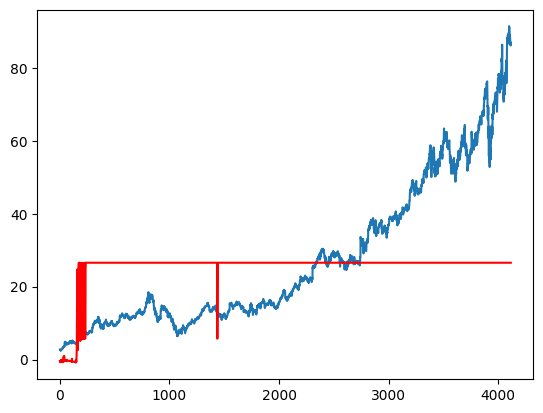

In [ ]:
import matplotlib.pyplot as plt

result=predict(train_set_x,model_filter)
fig,ax=plt.subplots()
ax.plot(train_set_y)
ax.plot(result, color='r')
plt.show()

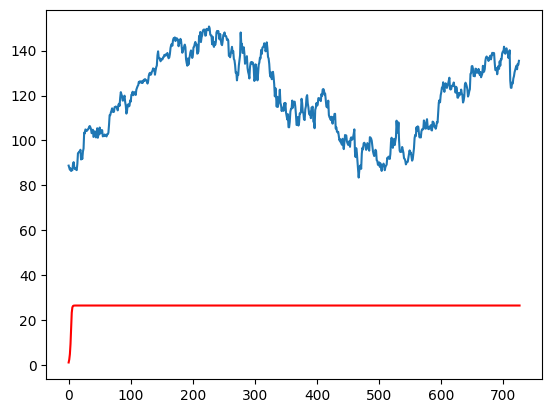

In [ ]:
import matplotlib.pyplot as plt

result=predict(test_set_x,model_filter)
fig,ax=plt.subplots()
ax.plot(test_set_y)
ax.plot(result, color='r')
plt.show()

In [ ]:
criterion=torch.nn.MSELoss()
test_pred=predict(test_set_x,model_filter)
np.sum((test_pred-test_set_y)**2)/len(test_set_y)

7135903.341846462